In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [3]:
df = pd.read_csv('HumanResources.csv')
df.head()

,employee_id,first_name,last_name,gender,state,city,hire_date,department,job_title,education_level,performance_rating,overtime,base_salary,salary,birth_date,termination_date
0,00-73695798,Olimpiada,Fedotova,Female,Moscow,Moscow,2017-08-28,Sales,Sales Specialist,Bachelor,Good,No,79104,84511,1994-07-25,NaN
1,00-81018730,Ljubov',Baranova,Female,Moscow,Moscow,2022-05-19,Customer Service,Support Specialist,Bachelor,Satisfactory,Yes,54030,58165,1983-12-04,NaN
2,00-29139495,Mstislav,Trofimov,Male,Moscow,Moscow,2018-04-10,Operations,Operations Analyst,Master,Good,No,55805,60266,1974-05-17,NaN
3,00-60298696,Rodion,Pahomov,Male,Moscow,Moscow,2019-11-11,Sales,Sales Representative,Bachelor,Needs Improvement,No,53844,64566,1995-05-02,NaN
4,00-96356860,Zosima,Naumov,Male,Kazan,Kazan,2023-01-01,Operations,Inventory Specialist,High School,Needs Improvement,No,58672,61998,2004-07-13,NaN


In [4]:
df['Attrition'] = df['termination_date'].notna().astype(int)

In [5]:
df.drop(columns=['employee_id','first_name','last_name','termination_date'],inplace = True)

In [6]:
df['hire_date']=pd.to_datetime(df['hire_date'])
df['birth_date']=pd.to_datetime(df['birth_date'])

df['age']=(pd.Timestamp.today() - df['birth_date']).dt.days //365
df['experience_years']=(pd.Timestamp.today() - df['hire_date']).dt.days //365

df.drop(columns=['hire_date','birth_date'],inplace=True)

In [7]:
df['gender']=df['gender'].map({'Female':0,'Male':1})
df['overtime']=df['overtime'].map({'Yes':1,'No':0})

education_map={'High School':1,'Bachelor':2,'Master':3,'PhD':4}
df['education_level']=df['education_level'].map(education_map)

performance_map={
    'Needs Improvement':1,
    'Statisfactory':2,
    'Good':3,
    'Excellent':4
}
df['performance_rating']=df['performance_rating'].map(performance_map)

In [8]:
df=pd.get_dummies(
    df,
    columns=['state','city','department','job_title'],
    drop_first=True
)

In [9]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

X_train,X_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
    )

In [10]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
x_test=scalar.transform(X_test)

In [11]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
x_test=scalar.transform(X_test)

C:\Users\user5\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [12]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



C:\Users\user5\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\user5\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\user5\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\user5\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

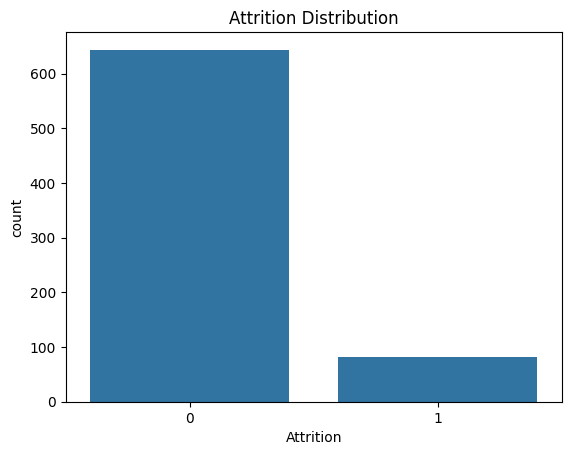

In [15]:
sns.countplot(x ='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

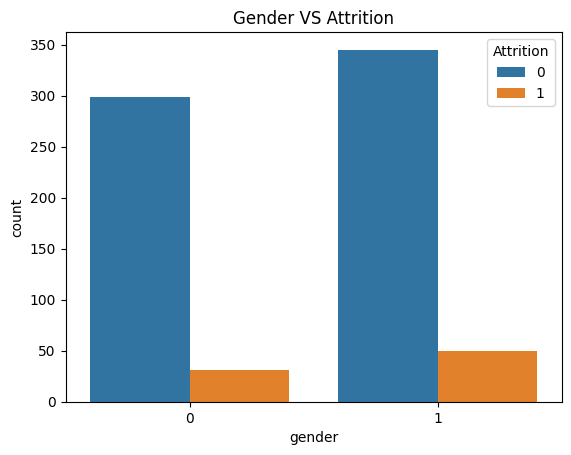

In [16]:
sns.countplot(x='gender',hue='Attrition',data=df)
plt.title("Gender VS Attrition")
plt.show()

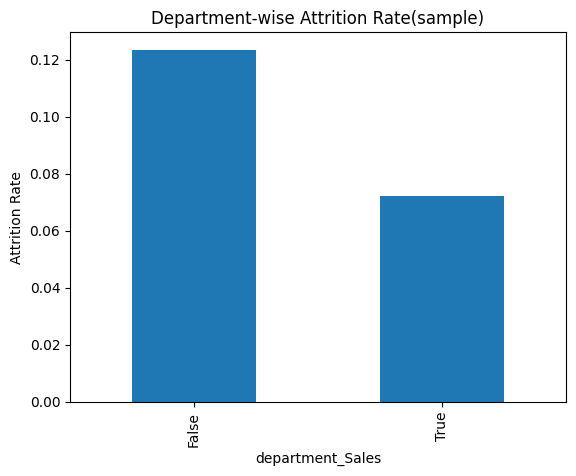

In [18]:
dept_attr = df.groupby('department_Sales')['Attrition'].mean()
dept_attr.plot(kind='bar')
plt.title("Department-wise Attrition Rate(sample)")
plt.ylabel("Attrition Rate")
plt.show()

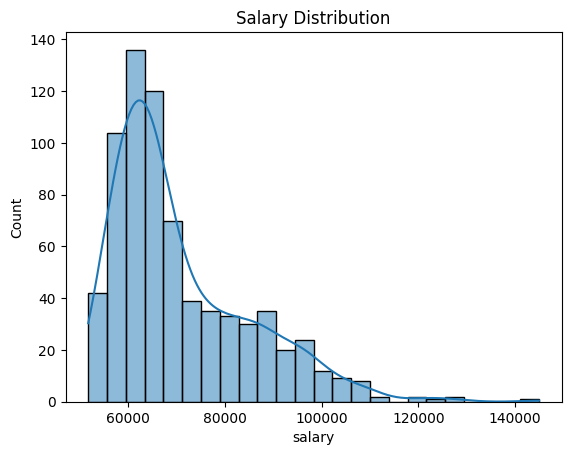

In [20]:
sns.histplot(df['salary'],kde = True)
plt.title("Salary Distribution")
plt.show()

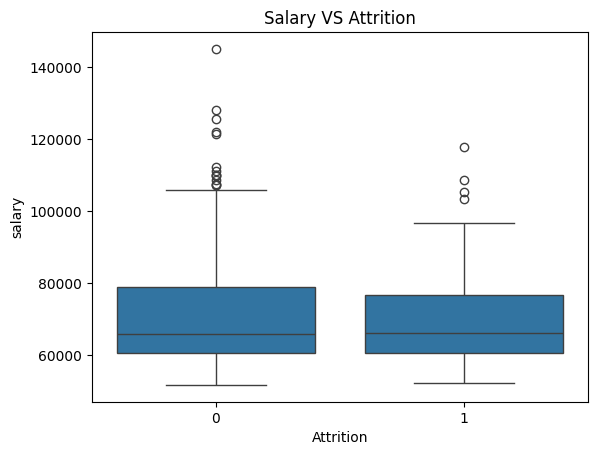

In [21]:
sns.boxplot(x='Attrition',y='salary',data=df)
plt.title("Salary VS Attrition")
plt.show()

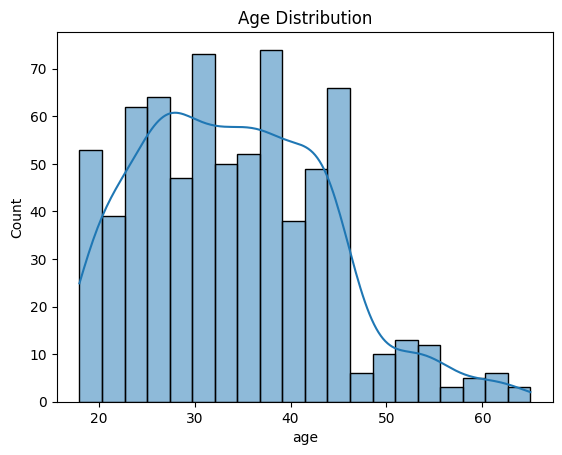

In [22]:
sns.histplot(df['age'],bins=20,kde=True)
plt.title("Age Distribution")
plt.show()

Boxplot

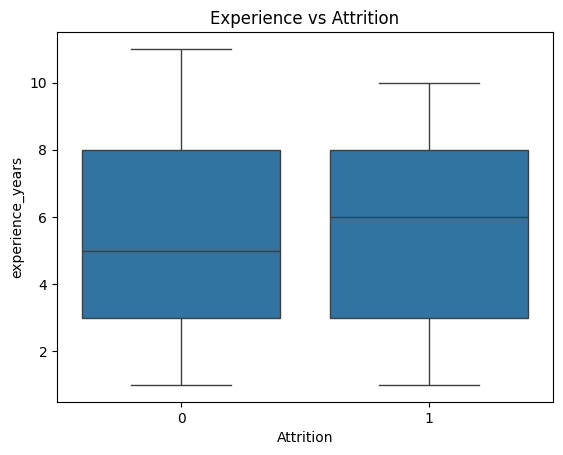

In [25]:
sns.boxplot(x='Attrition',y='experience_years',data=df)
plt.title('Experience vs Attrition')
plt.show()

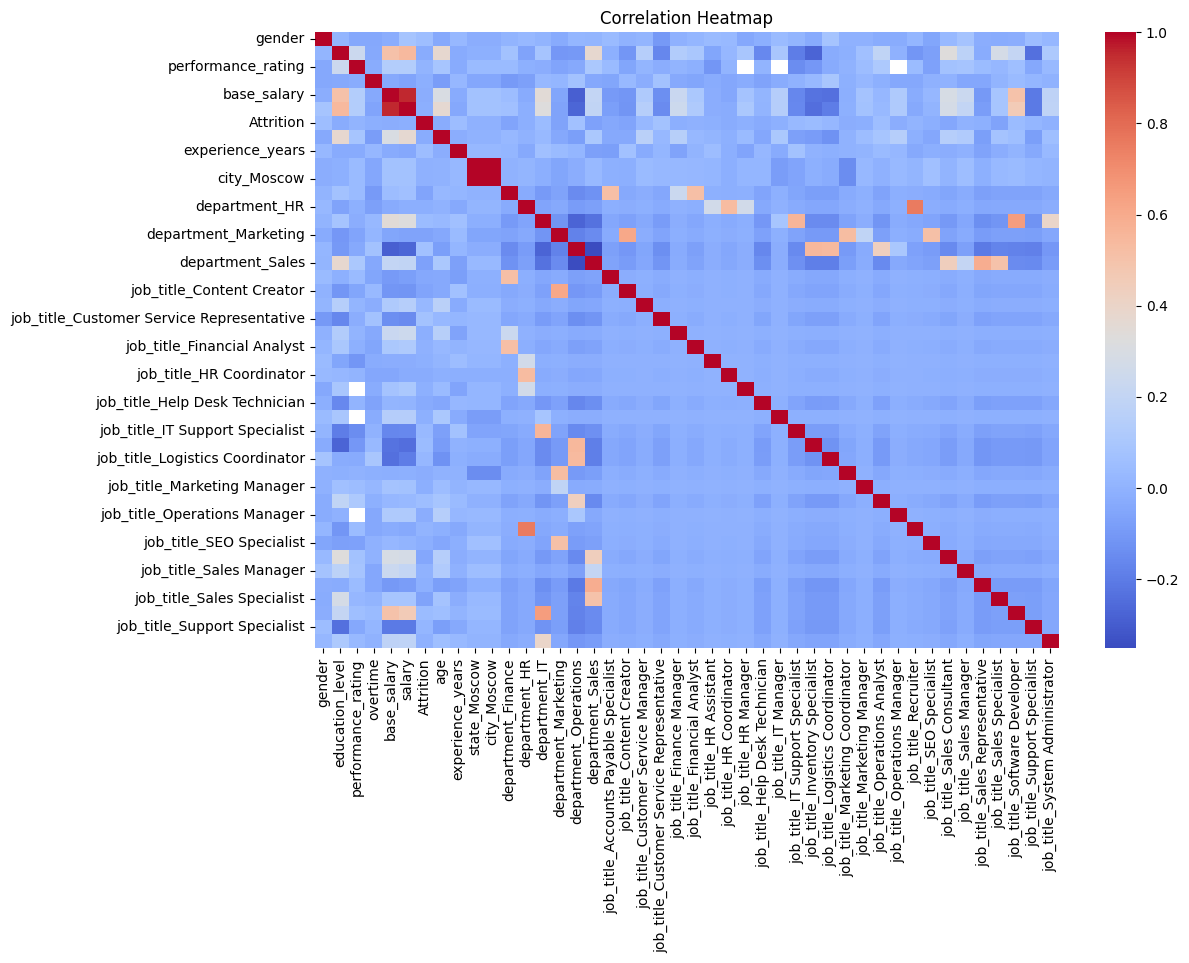

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [27]:
df['salary_difference']=df['salary']-df['base_salary']

In [28]:
df.groupby('Attrition')['salary_difference'].mean()

Attrition
0    7541.083851
1    7636.061728
Name: salary_difference, dtype: float64

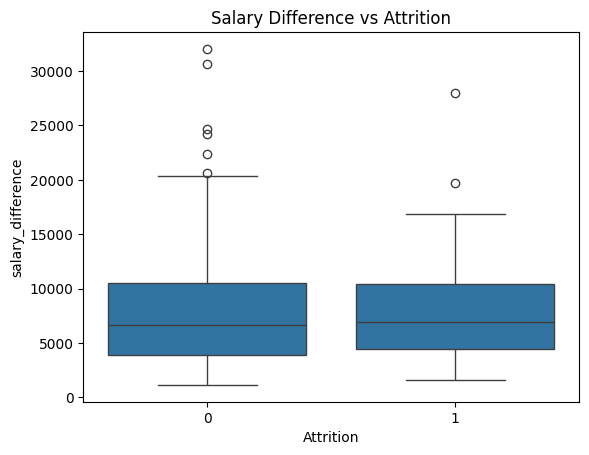

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Attrition", y="salary_difference", data=df)
plt.title("Salary Difference vs Attrition")
plt.show()

In [ ]:
df[['salary_difference']]